In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd

In [4]:
os.chdir('D:\Python\加州房价预测')

In [5]:
from IPython.display import Image

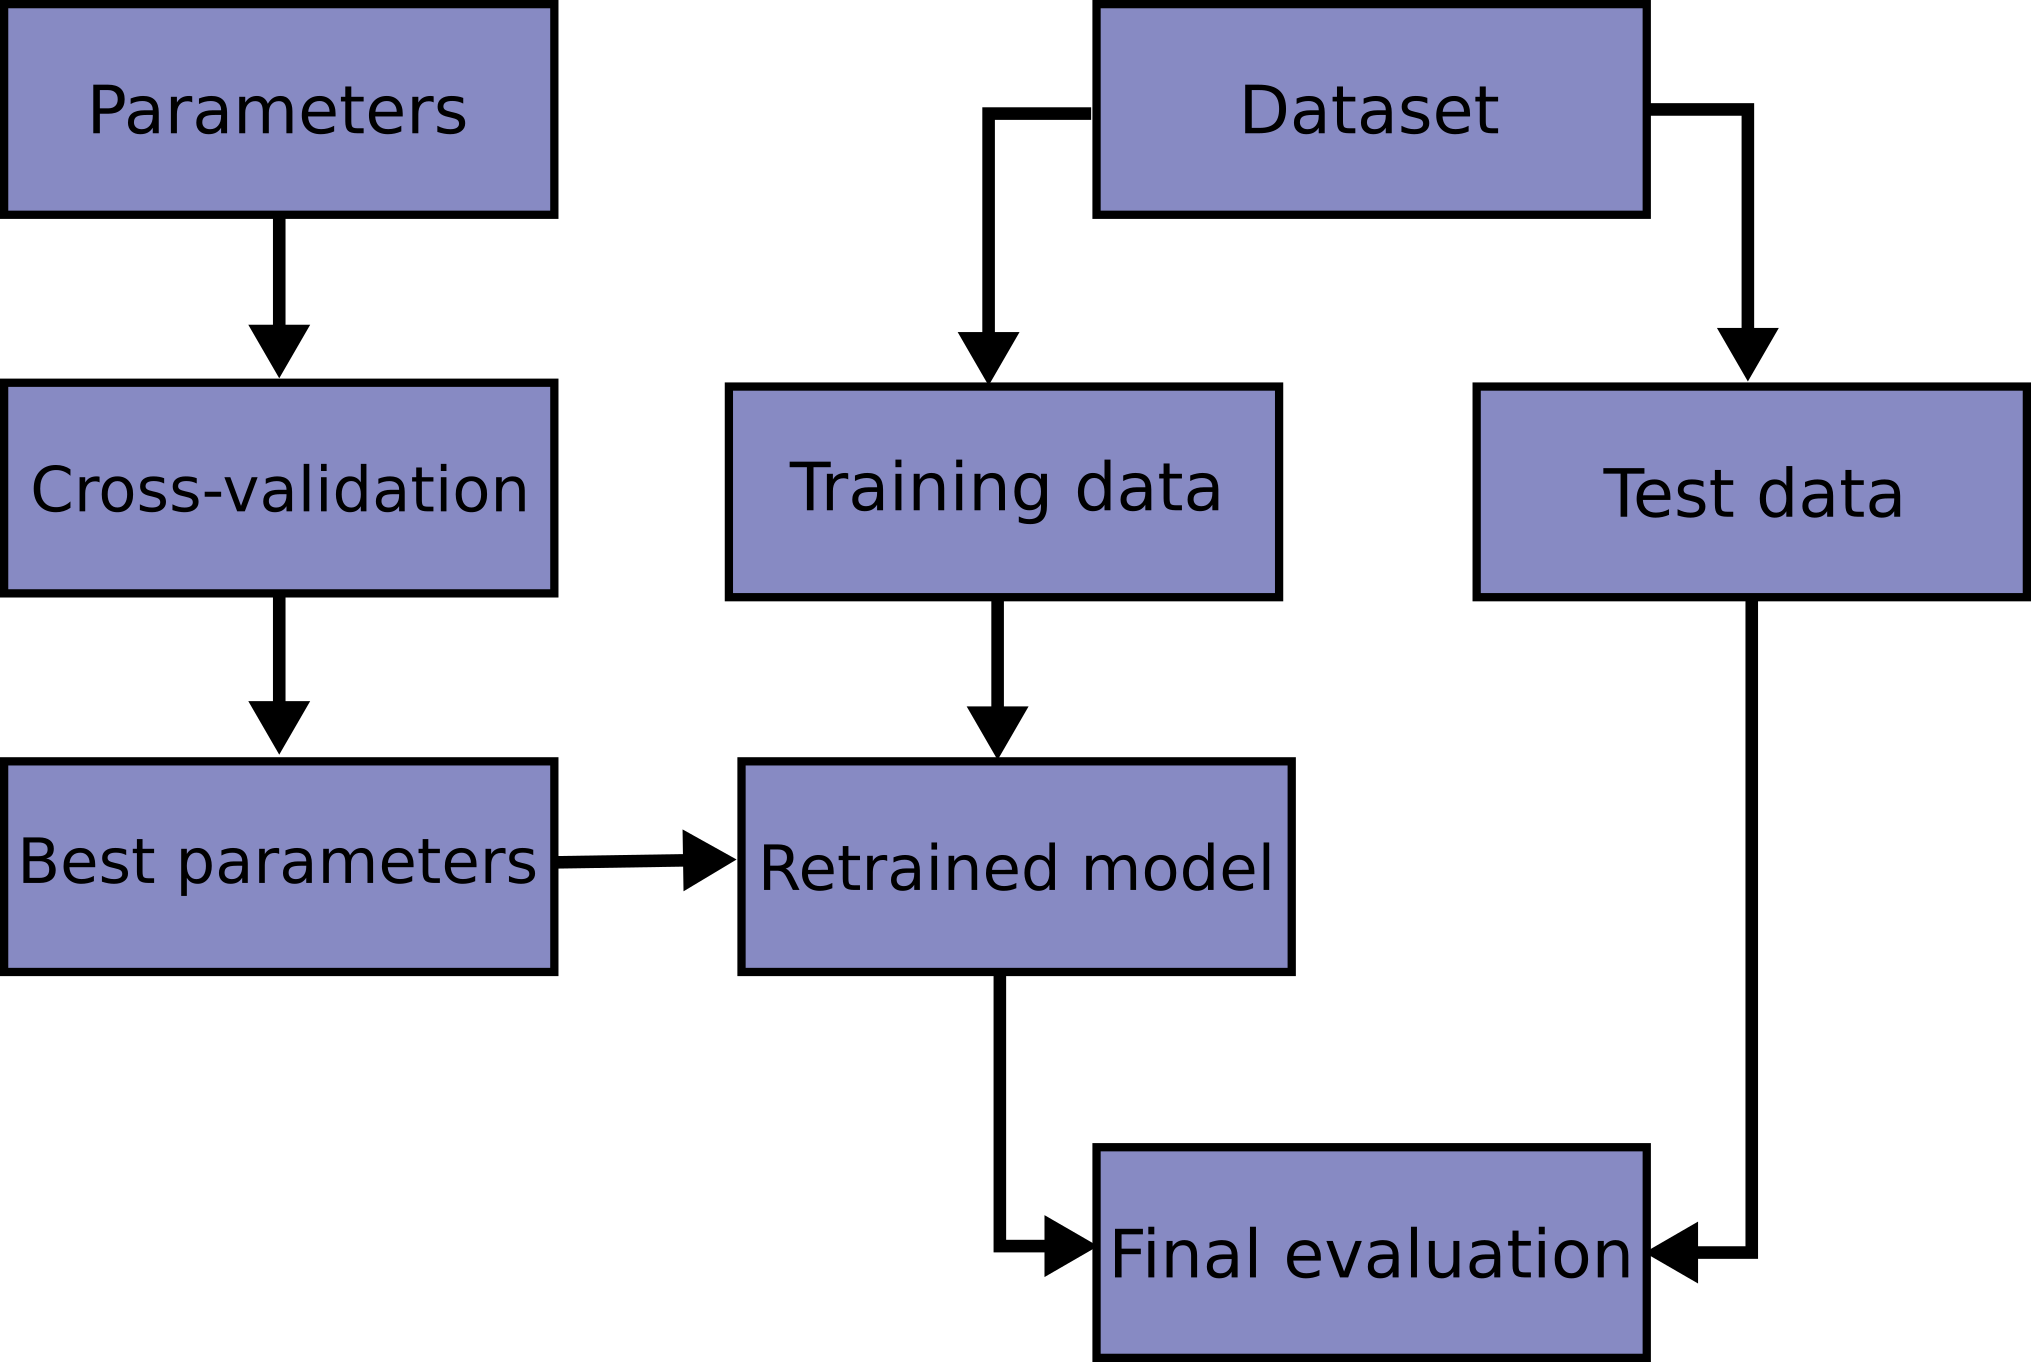

In [6]:
Image("1.png",width=500,height=500)

In [7]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
 housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:

#查看各属性摘要
housing.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640,NaN,NaN,NaN,-119.57,2.00353,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640,NaN,NaN,NaN,35.6319,2.13595,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640,NaN,NaN,NaN,28.6395,12.5856,1,18,29,37,52
total_rooms,20640,NaN,NaN,NaN,2635.76,2181.62,2,1447.75,2127,3148,39320
total_bedrooms,20433,NaN,NaN,NaN,537.871,421.385,1,296,435,647,6445
population,20640,NaN,NaN,NaN,1425.48,1132.46,3,787,1166,1725,35682
households,20640,NaN,NaN,NaN,499.54,382.33,1,280,409,605,6082
median_income,20640,NaN,NaN,NaN,3.87067,1.89982,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640,NaN,NaN,NaN,206856,115396,14999,119600,179700,264725,500001
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


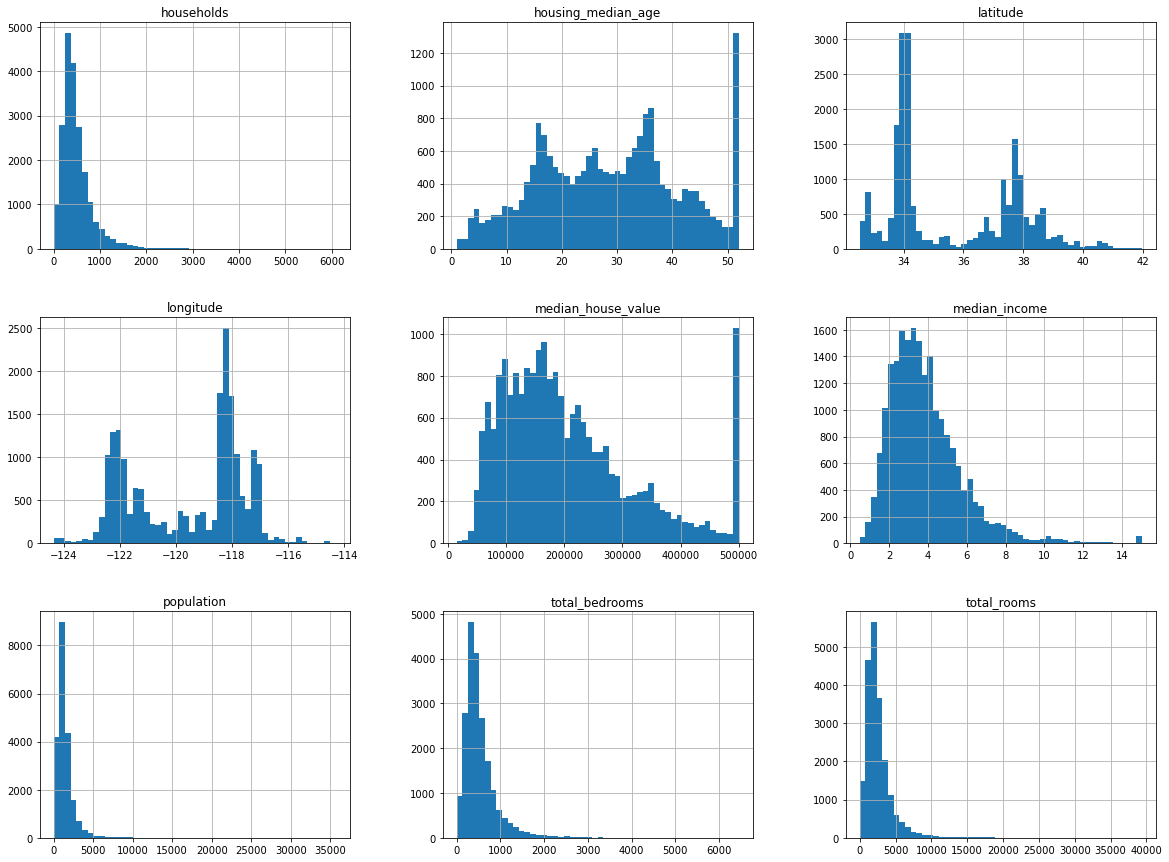

In [11]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
#数据拆分，创建测试集
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42,shuffle=False)

In [13]:



train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
16507,-121.11,37.74,11.0,3886.0,599.0,1605.0,529.0,4.4213,182700.0,INLAND
16508,-121.10,37.80,35.0,1853.0,331.0,958.0,340.0,3.3578,149000.0,INLAND
16509,-121.11,37.76,22.0,2606.0,411.0,1252.0,397.0,4.1833,192100.0,INLAND
16510,-121.16,37.73,7.0,4956.0,941.0,3006.0,915.0,3.4426,139000.0,INLAND


In [14]:
import hashlib
def test_set_check(identifier,test_ratio,hash=hashlib.md5):
    return(hash(np.int64(identifier)).digest()[-1]<256*test_ratio)

In [15]:
m=hashlib.sha256()

In [16]:


m.update(b"Nobody inspects")
m.update(b"the spammish repetition")
m.digest()

b'\x13g\xe1QV\nE\xcd\x88\x1d\x89\xb1\x03\xd3\xf3~\xc5\xa9\x1c\xcf\xc4\x89\xd0\xbb\xf1\xe0\x9e0\xcd\xaa,\xf2'

In [17]:
hashlib.sha256(b'Nobody inspects the spammish repetition').digest()

b'\x03\x1e\xdd}Ae\x15\x93\xc5\xfe\\\x00o\xa5u+7\xfd\xdf\xf7\xbcN\x84:\xa6\xaf\x0c\x95\x0fK\x94\x06'

In [18]:
def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return(data.loc[~in_test_set],data.loc[in_test_set])

In [19]:
housing_with_id=housing.reset_index()
train_set1,test_set1=split_train_test_by_id(housing_with_id,0.2,"index")

In [20]:
housing_with_id["id"]=housing.longitude*1000+housing.latitude
train_set2,test_set2=split_train_test_by_id(housing_with_id,0.2,"id")

In [21]:
housing["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [22]:
housing["income_cat"]=np.ceil(housing.median_income/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [23]:
housing["income_cat"].value_counts(sort=False)

5.0    2362
4.0    3639
3.0    7236
2.0    6581
1.0     822
Name: income_cat, dtype: int64

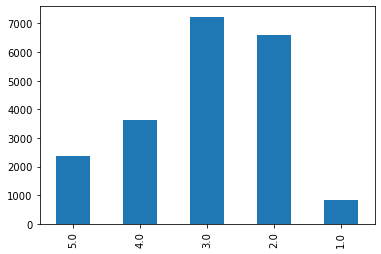

In [24]:
housing.income_cat.value_counts(sort=False).plot.bar()
plt.show()

In [25]:
#分层抽样
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(housing,housing.income_cat):
    train_set3=housing.loc[train_index]
    test_set3=housing.loc[test_index]

In [26]:
train_set4,test_set4 = train_test_split(housing,test_size=0.2,random_state=42)
Random = test_set4.income_cat.value_counts(normalize=True)
Overall = housing.income_cat.value_counts(normalize=True)
Stratified = test_set3.income_cat.value_counts(normalize=True)
Contrast = pd.DataFrame({"Overall":Overall,"Random":Random,"Stratified":Stratified},
             index=[1.,2.,3.,4.,5.])
Contrast["Rand.%error"] = (Contrast.Random-Contrast.Overall)/Contrast.Overall*100
Contrast["Strat.%error"] = (Contrast.Stratified-Contrast.Overall)/Contrast.Overall*100
Contrast

,Overall,Random,Stratified,Rand.%error,Strat.%error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [27]:
for set in (train_set3,test_set3):
    set.drop(columns="income_cat",inplace=True)

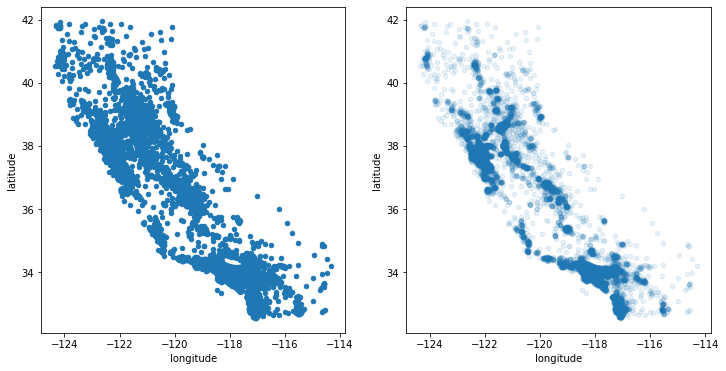

In [28]:
housing = train_set3.copy()
fig,axs = plt.subplots(1,2,figsize=(12,6))
# 设置子图分布
housing.plot(kind="scatter",x="longitude",y="latitude",ax=axs[0])
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,ax=axs[1])
# alpha表示透明度
plt.show()

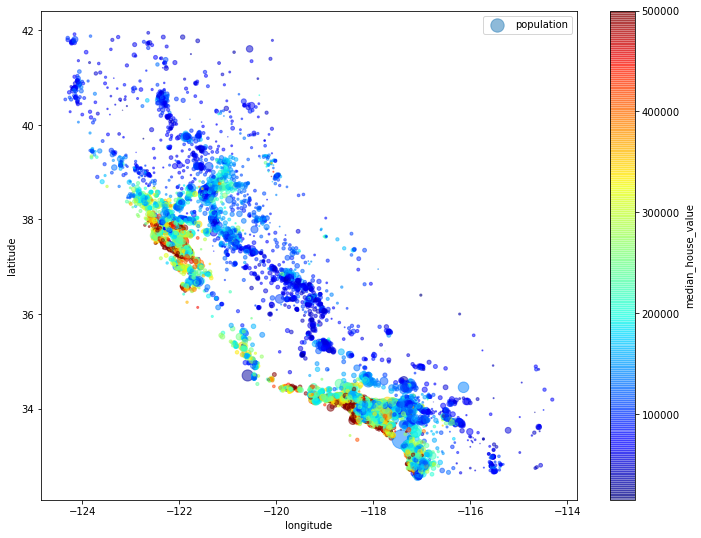

In [29]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,
            s=housing["population"]/100,label="population",
            c="median_house_value",cmap="jet",colorbar=True,
            figsize=(12,9),sharex=False)
plt.show()

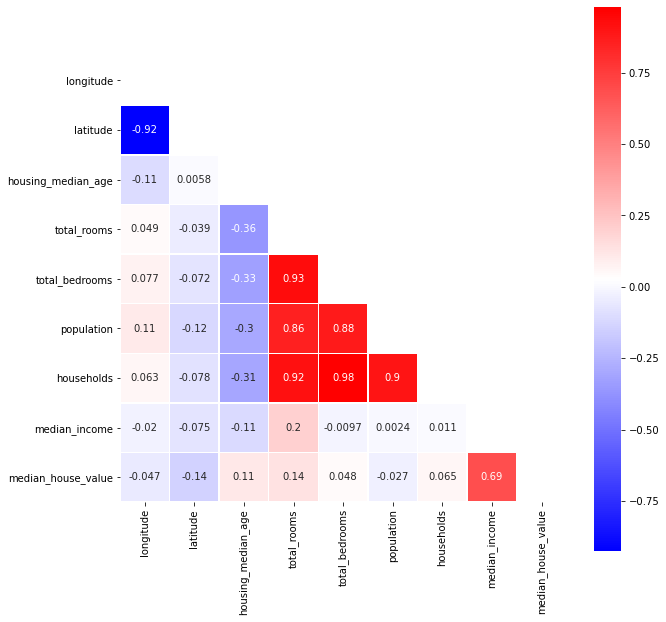

In [30]:
#计算相关系数矩阵并绘图
corr_matrix = housing.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, mask=mask, square=True, cmap="bwr", 
                 annot=True, linewidth=0.5)


In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

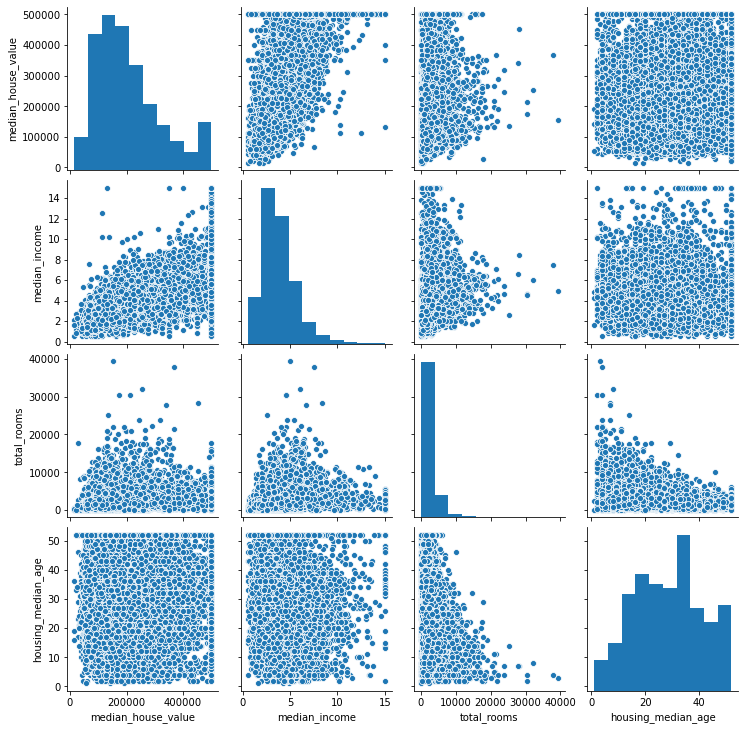

In [32]:
attributes = ["median_house_value","median_income","total_rooms",
              "housing_median_age"]
sns.pairplot(housing[attributes])
plt.show()

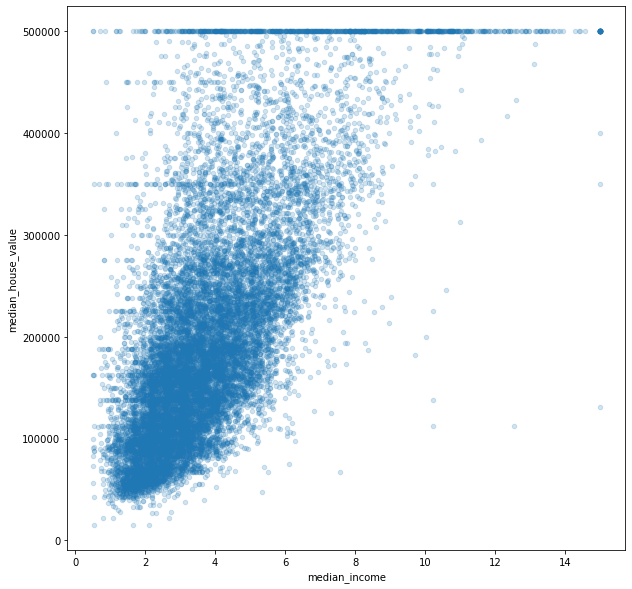

In [33]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",
             alpha=0.2,figsize=(10,10))

In [34]:
value_counts = housing.median_house_value.value_counts()
value_counts[value_counts > 50]

500001.0    786
137500.0    102
162500.0     91
112500.0     80
187500.0     76
225000.0     70
350000.0     65
87500.0      59
150000.0     58
175000.0     52
100000.0     51
Name: median_house_value, dtype: int64

In [35]:
housing["rooms_per_household"] = housing.total_rooms/housing.households
housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
housing["population_per_household"] = housing.population/housing.households
cols = housing.columns.tolist()
cols = (cols[:-5]+cols[-4:])+[cols[-5]]
housing = housing[cols]

In [36]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'median_house_value'],
      dtype='object')

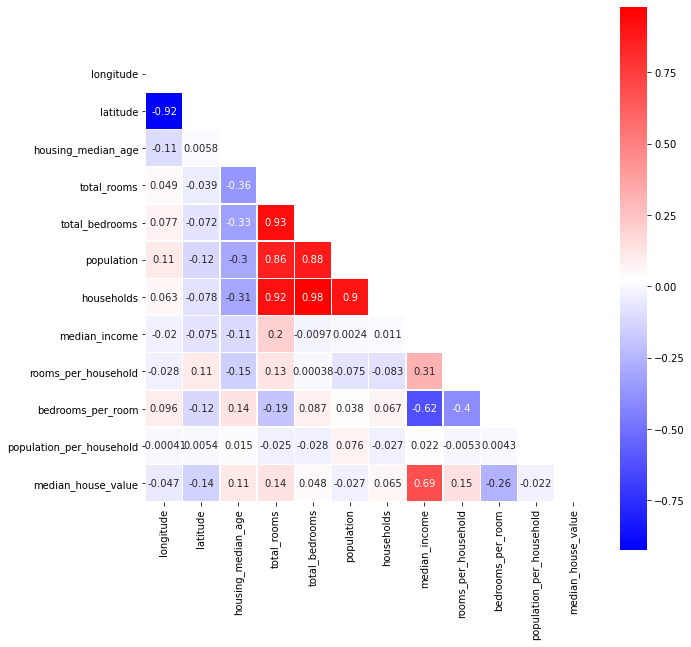

In [37]:
corr_matrix = housing.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, mask=mask, square=True, cmap="bwr", 
                 annot=True, linewidth=0.5)

In [42]:
housing = train_set3.drop(columns="median_house_value")
housing_labels = train_set3.median_house_value.copy()

In [43]:
#缺失值处理
housing.isnull().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.009569
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
dtype: float64

In [44]:
# 删除对应行
housing.dropna(subset=["total_bedrooms"])
# 填补中位数
median = housing.total_bedrooms.median()
housing.total_bedrooms.fillna(median)
median

433.0

In [45]:
from sklearn.impute import SimpleImputer
# 创建一个imputer实例,插补策略选择中位数
imputer = SimpleImputer(strategy="median")

In [46]:
housing_num = housing.drop(columns="ocean_proximity")

In [47]:
X = imputer.fit_transform(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [48]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [49]:
housing_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,16512.0,-119.575834,2.001860,-124.3500,-121.800000,-118.5100,-118.010000,-114.3100
latitude,16512.0,35.639577,2.138058,32.5400,33.940000,34.2600,37.720000,41.9500
housing_median_age,16512.0,28.653101,12.574726,1.0000,18.000000,29.0000,37.000000,52.0000
total_rooms,16512.0,2622.728319,2138.458419,6.0000,1443.000000,2119.5000,3141.000000,39320.0000
total_bedrooms,16512.0,533.998123,410.839621,2.0000,296.000000,433.0000,641.000000,6210.0000
population,16512.0,1419.790819,1115.686241,3.0000,784.000000,1164.0000,1719.250000,35682.0000
households,16512.0,497.060380,375.720845,2.0000,279.000000,408.0000,602.000000,5358.0000
median_income,16512.0,3.875589,1.904950,0.4999,2.566775,3.5409,4.744475,15.0001


In [50]:
#使用多重插补策略填补缺失值
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
estimator = ExtraTreesRegressor(n_estimators=100, 
                                max_features='log2', 
                                bootstrap=True, 
                                random_state=0)
imp_median = IterativeImputer(estimator=estimator, 
                              max_iter=10, 
                              initial_strategy='median', 
                              skip_complete=True)

In [51]:
X1 = imp_median.fit_transform(housing_num)
housing_tr1 = pd.DataFrame(X1,columns=housing_num.columns)
housing_tr1.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,16512.0,-119.575834,2.001860,-124.3500,-121.800000,-118.5100,-118.010000,-114.3100
latitude,16512.0,35.639577,2.138058,32.5400,33.940000,34.2600,37.720000,41.9500
housing_median_age,16512.0,28.653101,12.574726,1.0000,18.000000,29.0000,37.000000,52.0000
total_rooms,16512.0,2622.728319,2138.458419,6.0000,1443.000000,2119.5000,3141.000000,39320.0000
total_bedrooms,16512.0,534.927114,412.489687,2.0000,294.067500,433.0000,644.250000,6210.0000
population,16512.0,1419.790819,1115.686241,3.0000,784.000000,1164.0000,1719.250000,35682.0000
households,16512.0,497.060380,375.720845,2.0000,279.000000,408.0000,602.000000,5358.0000
median_income,16512.0,3.875589,1.904950,0.4999,2.566775,3.5409,4.744475,15.0001


In [52]:
#处理分类属性
housing.ocean_proximity.value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [53]:
housing_cat = housing.ocean_proximity.values.reshape(-1,1)
housing_cat

array([['<1H OCEAN'],
       ['<1H OCEAN'],
       ['NEAR OCEAN'],
       ...,
       ['INLAND'],
       ['<1H OCEAN'],
       ['NEAR BAY']], dtype=object)

In [54]:
from sklearn.preprocessing import OneHotEncoder
housing_cat = housing.ocean_proximity.values.reshape(-1,1)
encoder = OneHotEncoder(drop=["INLAND"],sparse=False)
housing_cat_1hot = encoder.fit_transform(housing_cat)
print(encoder.categories_)
print(encoder.get_feature_names())
housing_cat_1hot

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
['x0_<1H OCEAN' 'x0_ISLAND' 'x0_NEAR BAY' 'x0_NEAR OCEAN']


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [55]:
#自定义转换器
from sklearn.base import BaseEstimator, TransformerMixin
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True,
                 rooms_ix=3,bedrooms_ix=4,population_ix=5,household_ix=6):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.rooms_ix = rooms_ix
        self.bedrooms_ix = bedrooms_ix
        self.population_ix = population_ix
        self.household_ix = household_ix
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        newcol1 = X[:,self.rooms_ix] / X[:,self.household_ix]
        newcol2 = X[:,self.population_ix] / X[:,self.household_ix]
        new_colnames = ["rooms_per_household","population_per_household"]
        X = np.c_[X, newcol1, newcol2]
        if self.add_bedrooms_per_room :
            newcol3 = X[:,self.bedrooms_ix] / X[:,self.rooms_ix]
            new_colnames.append("bedrooms_per_rooms")
            X = np.c_[X, newcol3]
        self.new_colnames = new_colnames
        return(X)

In [56]:
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs[:5,]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258],
       [-119.61, 36.31, 25.0, 1847.0, 371.0, 1460.0, 353.0, 1.8839,
        'INLAND', 5.232294617563739, 4.135977337110481],
       [-118.59, 34.23, 17.0, 6592.0, 1525.0, 4459.0, 1463.0, 3.0347,
        '<1H OCEAN', 4.50580997949419, 3.047846889952153]], dtype=object)

In [57]:
#转换流水线
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [58]:
num_int = [*range(8)]
cat_int = [8]
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("attribs_adder",CombinedAttributeAdder()),
    ("std_scaler",StandardScaler())])
cat_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder(drop="first"))])
preprocessor = ColumnTransformer([
    ("num",num_pipeline,num_int),
    ("cat",cat_pipeline,cat_int)],
    remainder="passthrough")

In [59]:
housing_processed = preprocessor.fit_transform(housing)
print(housing_processed.shape)
housing_processed[:5,:]

(16512, 15)


array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.49247384, -0.65929936, -0.92673619,  1.85619316,  2.41221109,
         2.72415407,  2.57097492, -0.44143679, 

# 建模

In [60]:
#训练线性回归模型
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_processed,housing_labels)

LinearRegression()

In [61]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = preprocessor.transform(some_data)
print("Predictions:\t",lin_reg.predict(some_data_prepared).round(2))
print("Labels:\t",list(some_labels))

Predictions:	 [210644.6  317768.81 210956.43  59218.99 189747.56]
Labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [62]:
#查看训练集RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_processed)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [63]:
#训练决策树模型
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_processed,housing_labels)

DecisionTreeRegressor()

In [64]:
#训练集评估
housing_predictions = tree_reg.predict(housing_processed)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# 交叉验证

In [65]:
#对决策树交叉验证
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_processed,housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [66]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
display_scores(tree_rmse_scores)

Scores: [70071.22652161 68149.63361537 71032.1918381  68332.15173984
 72506.55794928 74170.07820921 70737.20832225 69296.45706674
 73904.46131394 69163.57052835]
Mean: 70736.35371046861
Standard deviation: 2061.775087674305


In [67]:
#对线性回归交叉验证
lin_scores = cross_val_score(lin_reg,housing_processed,housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983493


In [68]:
#由此得出决策树严重过拟合
#随机森林
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=500,n_jobs=-1,random_state=12)
forest_scores = cross_val_score(forest_reg,housing_processed,housing_labels,
                               scoring="neg_mean_squared_error",cv=10)
display_scores(np.sqrt(-forest_scores))

Scores: [49363.3674325  47135.19836733 49686.11178549 52092.60423285
 49461.93380911 53171.15571193 48440.6071592  47804.14892627
 52600.31623341 49880.94587997]
Mean: 49963.638953805494
Standard deviation: 1935.2445993345368


In [69]:
#模型调优
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
    {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}
]
grid_search = GridSearchCV(RandomForestRegressor(),param_grid,cv=5,
                          scoring="neg_mean_squared_error")
grid_search.fit(housing_processed,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

### 
最好的参数组合

In [70]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

###最好的估算器

In [71]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [72]:
#评估分数
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64280.23436576779 {'max_features': 2, 'n_estimators': 3}
55696.00824515088 {'max_features': 2, 'n_estimators': 10}
52845.936706097316 {'max_features': 2, 'n_estimators': 30}
60203.257251555886 {'max_features': 4, 'n_estimators': 3}
52941.398924604335 {'max_features': 4, 'n_estimators': 10}
50418.83163504766 {'max_features': 4, 'n_estimators': 30}
59451.911673220624 {'max_features': 6, 'n_estimators': 3}
52215.885605820076 {'max_features': 6, 'n_estimators': 10}
50121.95062420035 {'max_features': 6, 'n_estimators': 30}
58598.56001649285 {'max_features': 8, 'n_estimators': 3}
52675.26957096538 {'max_features': 8, 'n_estimators': 10}
50288.58236607248 {'max_features': 8, 'n_estimators': 30}
62861.82882170787 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53784.991321391026 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60219.12394632967 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52918.67197909816 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [73]:
#在随机森林中查看特征重要度
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.00469621e-02, 7.06723252e-02, 4.42632038e-02, 1.78255380e-02,
       1.63858062e-02, 1.69928745e-02, 1.64277907e-02, 3.38026167e-01,
       6.03556936e-02, 1.07981776e-01, 7.49967710e-02, 1.59578625e-01,
       7.14266543e-05, 2.37524817e-03, 3.99979287e-03])

In [74]:
extra_attribs = ["rooms_per_household","population_per_household",
                 "bedrooms_per_rooms"]
cat_encoder = cat_pipeline[1]
cat_encoder.fit_transform(housing.ocean_proximity.values.reshape(-1,1))
cat_attribs = list(housing.columns[8]+"_"+cat_encoder.categories_[0][1:])
colnames = list(housing.columns[:8])+extra_attribs+cat_attribs
sorted(zip(feature_importance,colnames),reverse=True)

[(0.3380261668890009, 'median_income'),
 (0.1595786247395069, 'ocean_proximity_INLAND'),
 (0.10798177562197284, 'population_per_household'),
 (0.07499677099075368, 'bedrooms_per_rooms'),
 (0.07067232517869863, 'latitude'),
 (0.0700469621134103, 'longitude'),
 (0.06035569358999651, 'rooms_per_household'),
 (0.044263203761771744, 'housing_median_age'),
 (0.01782553803900608, 'total_rooms'),
 (0.016992874509048496, 'population'),
 (0.016427790691482293, 'households'),
 (0.016385806174374438, 'total_bedrooms'),
 (0.003999792872249898, 'ocean_proximity_NEAR OCEAN'),
 (0.0023752481743828297, 'ocean_proximity_NEAR BAY'),
 (7.142665434443435e-05, 'ocean_proximity_ISLAND')]

In [75]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first'))])

In [76]:
cat_pipeline.steps

[('imputer', SimpleImputer(strategy='most_frequent')),
 ('onehot', OneHotEncoder(drop='first'))]

In [77]:
cat_pipeline[1]

OneHotEncoder(drop='first')

##测试集评估模型

In [78]:
final_model = grid_search.best_estimator_
X_test = test_set3.drop(columns="median_house_value")
y_test = test_set3.median_house_value.copy()
X_test_processed = preprocessor.transform(X_test)
y_test_hat = final_model.predict(X_test_processed)
final_mse = mean_squared_error(y_test,y_test_hat)
final_rmse = np.sqrt(final_mse)
final_rmse

48187.55873447505